# Project 6: Working with Geocoded Data

## Building Maps in _geopandas_

In this lesson we will download COVID-19 data from data.world. We will normalize the data to compare spread between counties. Were we to simply plot the total number of cases or deaths by county, the results would be biased as counties with larger populations would likely have more cases and more deaths. We will observe how the spread developed across the country, starting in the northeast, eventually making its way to other regions.

### Installing geopandas

Although there is a geopandas installation available using the *conda install* command in you command line shell, that package is incomplete for our purposes. We will need to install dependencies - in this order: *GDAL*,*Fiona*, and *Shapely* - for geopandas before installing geopandas. I have included the *.whl* files for each of these packages in the same folder is this notebook. Download the files and save them to your local folder. To install, use  the command:

> *pip install filename*

If you are using a machine for which you are not the administrator, use the command:

> *pip install filename --user*

Install the libraries using these commands from an administrator shell or using --user at the end of the statement: 

>*pip install GDAL-3.1.4-cp37-cp37m-win_amd64.whl*

>*pip install Fiona-1.8.17-cp37-cp37m-win_amd64.whl*

>*pip install Shapely-1.7.1-cp37-cp37m-win_amd64.whl*

If you are using Python 3.8, use the following wheels:

>*pip install GDAL-3.1.4-cp38-cp38-win_amd64.whl*

>*pip install Fiona-1.8.17-cp38-cp38-win_amd64.whl*

>*pip install Shapely-1.7.1-cp38-cp38-win_amd64.whl*

If you are using a mac, you may install the appropriate module by selecting the version.

> *pip install -v GDAL==3.1.4*

> *pip install -v Fiona==1.8.17*

> *pip install -v Shapely==1.7.1*

Finally, install geopandas:

> *pip install geopandas*


### Downloading the COVID-19 data

We will use two datasets. First, we will import a shapefile to use with *geopandas*, which we will later use to generate a county level map that tracks COVID-19. The shapefile is provide for you in the Github folder housing this post. You can also download shapefiles from the U.S. Census [website](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html). We will download Johns Hopkins's COVID-19 data from the Associated Press's [account](https://data.world/associatedpress/johns-hopkins-coronavirus-case-tracker) at data.world using their [Python module](https://data.world/integrations/python). Follow [these instructions](https://github.com/datadotworld/data.world-py/) to install the  *datadotworld* module and access their API.

>*Datadotworld* may be useful efficiently collecting data for class projects, so keep this libary in mind as you make plans for your project.

First we will create the functions that download and import the data, then we will call these functions in the following cells.

In [1]:
# https://www.lfd.uci.edu/~gohlke/pythonlibs/
# this link is for installing specific library 

In [ ]:
# cd: change the directory 
# the directory needs a quotation mark 
# there is no need the quatation mark for the file

In [2]:
# https://github.com/datadotworld/data.world-py
# this is to install the dataworld module

In [8]:
# dataworld, setting, go to advanced, get the API token 

In [ ]:
# we are going to turn the covid-19 data into a geo data frame as covid-19 data is not a geo dataframe but the standard pandas dataframe 
# we want to be able to transform the covid-19 data which is time series to do dataframe using the shape file import 

In [15]:
#first step 
import numpy as np
import pandas as pd
import geopandas
import datetime

import datadotworld as dw

# we download the covid data  using dataworld 
def import_covid_data(FIPS_name):
    # Load COVID19 which is county data using datadotworld API
    # Data provided by John Hopkins, file provided 
    # by Associated Press
    dataset = dw.load_dataset(
        "associatedpress/johns-hopkins-coronavirus-case-tracker",
        auto_update = True)
    
    #the dataset includes multiple dataframes. We will oselct #2 from the lsit 
    covid_data = dataset.dataframes[
        "2_cases_and_deaths_by_county_timeseries"]
    # narrow down the dataset by the fipps number 
    covid_data = covid_data[covid_data[FIPS_name] < 57000]
    covid_data = covid_data[covid_data[FIPS_name] > 0]
    return covid_data

In [16]:
fips_name = "fips_code"
# rename_FIPS matches map_data FIPS with COVID19 FIPS name
# save our covid data and all the steps are in this inport covid data function 
covid_data = import_covid_data(FIPS_name = fips_name)

C:\Users\Shane\anaconda3\lib\site-packages\datadotworld\models\dataset.py:206: UserWarning: Unable to set data frame dtypes automatically using 2_cases_and_deaths_by_county_timeseries schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 2
  warnings.warn(


In [17]:
covid_data

,uid,location_type,fips_code,location_name,state,date,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000,new_cases,new_deaths,new_cases_per_100_000,new_deaths_per_100_000,new_cases_7_day_rolling_avg,new_deaths_7_day_rolling_avg
22800,84001001,county,1001.0,Autauga,Alabama,2020-01-22,55200.0,0,0.00,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
22801,84001001,county,1001.0,Autauga,Alabama,2020-01-23,55200.0,0,0.00,0,0.0,0.0,0.0,0.00,0.0,NaN,NaN
22802,84001001,county,1001.0,Autauga,Alabama,2020-01-24,55200.0,0,0.00,0,0.0,0.0,0.0,0.00,0.0,NaN,NaN
22803,84001001,county,1001.0,Autauga,Alabama,2020-01-25,55200.0,0,0.00,0,0.0,0.0,0.0,0.00,0.0,NaN,NaN
22804,84001001,county,1001.0,Autauga,Alabama,2020-01-26,55200.0,0,0.00,0,0.0,0.0,0.0,0.00,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918265,84056045,county,56045.0,Weston,Wyoming,2020-10-28,7100.0,148,2084.51,0,0.0,9.0,0.0,126.76,0.0,6.43,0.0
918266,84056045,county,56045.0,Weston,Wyoming,2020-10-29,7100.0,155,2183.10,0,0.0,7.0,0.0,98.59,0.0,5.71,0.0
918267,84056045,county,56045.0,Weston,Wyoming,2020-10-30,7100.0,159,2239.44,0,0.0,4.0,0.0,56.34,0.0,5.43,0.0
918268,84056045,county,56045.0,Weston,Wyoming,2020-10-31,7100.0,163,2295.77,0,0.0,4.0,0.0,56.34,0.0,5.14,0.0


In [ ]:
# learn how to intepret the time series data from Dr. Caton's artile 
# https://www.ndsu.edu/centers/pcpe/news/detail/58432/
# we use per capita or per hundred thousand or more per million
# we take data per person in the state not comparing the observed levels without normalizing by population 

In [ ]:
# one mistake we should avoid is that people will log the rates, not just people. 
# financial times consitently presents rates on a log to accesss which totally skews presentation 
# Because if you are presenting rates, logging your access to be supposed to make it so that the slope of your lines indicate the rates

In [ ]:
# transform the fips into integers 


In [18]:
import numpy as np
import pandas as pd
import geopandas
import datetime

import datadotworld as dw

# we download the covid data  using dataworld 
def import_covid_data(FIPS_name):
    # Load COVID19 which is county data using datadotworld API
    # Data provided by John Hopkins, file provided 
    # by Associated Press
    dataset = dw.load_dataset(
        "associatedpress/johns-hopkins-coronavirus-case-tracker",
        auto_update = True)
    
    #the dataset includes multiple dataframes. We will oselct #2 from the lsit 
    covid_data = dataset.dataframes[
        "2_cases_and_deaths_by_county_timeseries"]
    # narrow down the dataset by the fipps number 
    covid_data = covid_data[covid_data[FIPS_name] < 57000]
    covid_data = covid_data[covid_data[FIPS_name] > 0]
    
    # turn from floats to integers
    # save the integers, in the very same column, so that the new column will be inttegers, replacing the old flots
    covid_data[FIPS_name] = covid_data[FIPS_name].astype(int)
     
    # set the index, the index makes it easier to get access the data for pandas to interpret the dataframe 
    # in place means being saved 
    covid_data.set_index([FIPS_name, "date"], inplace = True) 
    
    # Prepare a column for state abbreviations. we will draw these 
    # from state_dict
    # we initialize the column and we make a bunch of blank strings because we want to be strings that save the abbreviates of the strings
    covid_data["state_abr"] = ""
    for state, abr in state_dict.items():
        #.loc[row(s), col]
        # call covid data for all the rows wehre the state equals whatever the state, enter the value of understate abbreviations for those rows
        covid_data.loc[
            covid_data["state"] == state, "state_abr"] = abr
    # save location name as Cass, ND 
    # save the county comma state abbreviation 
    covid_data["Location"] = covid_data["location_name"] + ", " +\
        covid_data["state_abr"]
    return covid_data

# we import the geographic data as well. 
def import_geo_data(filename, index_col = "Date", 
                    FIPS_name = "FIPS"):
    # import county level shapefile
    map_data = geopandas.read_file(filename = filename, 
                                  index_col = index_col)
    map_data.rename(columns = {"State":"state"},
                   inplace = True)
    # Combine statefips and county fips to create a single fips value
    # that identifies each particular county without referencing the
    # state separately
    # they are not together, we make the state and county fips and concatenate them as strings 
    # and they will turn back into integers 
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) +\
        map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    map_data.set_index(FIPS_name, inplace = True)
    
    return map_data

# we create a dictionary linking the state names with the state abbreviations 
# we are going to use a more conveniently name and refer to data
state_dict = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ',
    'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 
    'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA','Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 
    'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 
    'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 
    'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 
    'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 
    'Wyoming': 'WY'}


In [19]:
fips_name = "fips_code"
# rename_FIPS matches map_data FIPS with COVID19 FIPS name
# save our covid data and all the steps are in this inport covid data function 
covid_data = import_covid_data(FIPS_name = fips_name)

C:\Users\Shane\anaconda3\lib\site-packages\datadotworld\models\dataset.py:206: UserWarning: Unable to set data frame dtypes automatically using 2_cases_and_deaths_by_county_timeseries schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 2
  warnings.warn(


In [20]:
covid_data

uid location_type location_name    state  \
fips_code date                                                        
1001      2020-01-22  84001001        county       Autauga  Alabama   
          2020-01-23  84001001        county       Autauga  Alabama   
          2020-01-24  84001001        county       Autauga  Alabama   
          2020-01-25  84001001        county       Autauga  Alabama   
          2020-01-26  84001001        county       Autauga  Alabama   
...                        ...           ...           ...      ...   
56045     2020-10-28  84056045        county        Weston  Wyoming   
          2020-10-29  84056045        county        Weston  Wyoming   
          2020-10-30  84056045        county        Weston  Wyoming   
          2020-10-31  84056045        county        Weston  Wyoming   
          2020-11-01  84056045        county        Weston  Wyoming   

                      total_population  cumulative_cases  \
fips_code date                                             
1001      2020-01-22           55200.0                 0   
          2020-01-23           55200.0                 0   
          2020-01-24           55200.0                 0   
          2020-01-25           55200.0                 0   
          2020-01-26           55200.0                 0   
...                                ...               ...   
56045     2020-10-28            7100.0               148   
          2020-10-29            7100.0               155   
          2020-10-30            7100.0               159   
          2020-10-31            7100.0               163   
          2020-11-01            7100.0               164   

                      cumulative_cases_per_100_000  cumulative_deaths  \
fips_code date                                                          
1001      2020-01-22                          0.00                  0   
          2020-01-23                          0.00                  0   
          2020-01-24                          0.00                  0   
          2020-01-25                          0.00                  0   
          2020-01-26                          0.00                  0   
...                                            ...                ...   
56045     2020-10-28                       2084.51                  0   
          2020-10-29                       2183.10                  0   
          2020-10-30                       2239.44                  0   
          2020-10-31                       2295.77                  0   
          2020-11-01                       2309.86                  0   

                      cumulative_deaths_per_100_000  new_cases  new_deaths  \
fips_code date                                                               
1001      2020-01-22                            0.0        NaN         NaN   
          2020-01-23                            0.0        0.0         0.0   
          2020-01-24                            0.0        0.0         0.0   
          2020-01-25                            0.0        0.0         0.0   
          2020-01-26                            0.0        0.0         0.0   
...                                             ...        ...         ...   
56045     2020-10-28                            0.0        9.0         0.0   
          2020-10-29                            0.0        7.0         0.0   
          2020-10-30                            0.0        4.0         0.0   
          2020-10-31                            0.0        4.0         0.0   
          2020-11-01                            0.0        1.0         0.0   

                      new_cases_per_100_000  new_deaths_per_100_000  \
fips_code date                                                        
1001      2020-01-22                    NaN                     NaN   
          2020-01-23                   0.00                     0.0   
          2020-01-24                   0.00                     0.0   
  

In [ ]:
# FIPS codes are numbers which uniquely identify geographic areas. 
# The number of digits in FIPS codes vary depending on the level of geography. 
# State-level FIPS codes have two digits, county-level FIPS codes have five digits of which the first two are the FIPS code of the state to which the county belongs.

In [ ]:
# it is possible to have a picture in picture on the map

In [4]:
fips_name = "fips_code"
# rename_FIPS matches map_data FIPS with COVID19 FIPS name
# save our covid data and all the steps are in this inport covid data function 
covid_data = import_covid_data(FIPS_name = fips_name)

C:\Users\Shane\anaconda3\lib\site-packages\datadotworld\models\dataset.py:206: UserWarning: Unable to set data frame dtypes automatically using 2_cases_and_deaths_by_county_timeseries schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 2
  warnings.warn(


In [5]:
covid_data

uid location_type location_name    state  \
fips_code date                                                        
1001      2020-01-22  84001001        county       Autauga  Alabama   
          2020-01-23  84001001        county       Autauga  Alabama   
          2020-01-24  84001001        county       Autauga  Alabama   
          2020-01-25  84001001        county       Autauga  Alabama   
          2020-01-26  84001001        county       Autauga  Alabama   
...                        ...           ...           ...      ...   
56045     2020-10-28  84056045        county        Weston  Wyoming   
          2020-10-29  84056045        county        Weston  Wyoming   
          2020-10-30  84056045        county        Weston  Wyoming   
          2020-10-31  84056045        county        Weston  Wyoming   
          2020-11-01  84056045        county        Weston  Wyoming   

                      total_population  cumulative_cases  \
fips_code date                                             
1001      2020-01-22           55200.0                 0   
          2020-01-23           55200.0                 0   
          2020-01-24           55200.0                 0   
          2020-01-25           55200.0                 0   
          2020-01-26           55200.0                 0   
...                                ...               ...   
56045     2020-10-28            7100.0               148   
          2020-10-29            7100.0               155   
          2020-10-30            7100.0               159   
          2020-10-31            7100.0               163   
          2020-11-01            7100.0               164   

                      cumulative_cases_per_100_000  cumulative_deaths  \
fips_code date                                                          
1001      2020-01-22                          0.00                  0   
          2020-01-23                          0.00                  0   
          2020-01-24                          0.00                  0   
          2020-01-25                          0.00                  0   
          2020-01-26                          0.00                  0   
...                                            ...                ...   
56045     2020-10-28                       2084.51                  0   
          2020-10-29                       2183.10                  0   
          2020-10-30                       2239.44                  0   
          2020-10-31                       2295.77                  0   
          2020-11-01                       2309.86                  0   

                      cumulative_deaths_per_100_000  new_cases  new_deaths  \
fips_code date                                                               
1001      2020-01-22                            0.0        NaN         NaN   
          2020-01-23                            0.0        0.0         0.0   
          2020-01-24                            0.0        0.0         0.0   
          2020-01-25                            0.0        0.0         0.0   
          2020-01-26                            0.0        0.0         0.0   
...                                             ...        ...         ...   
56045     2020-10-28                            0.0        9.0         0.0   
          2020-10-29                            0.0        7.0         0.0   
          2020-10-30                            0.0        4.0         0.0   
          2020-10-31                            0.0        4.0         0.0   
          2020-11-01                            0.0        1.0         0.0   

                      new_cases_per_100_000  new_deaths_per_100_000  \
fips_code date                                                        
1001      2020-01-22                    NaN                     NaN   
          2020-01-23                   0.00                     0.0   
          2020-01-24                   0.00                     0.0   
  

In [21]:
map_data = import_geo_data(
    filename = "countiesWithStatesAndPopulation.shp",
    index_col = "Date", FIPS_name= fips_name)

In [22]:
map_data

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,geometry
fips_code,,,,,,,,,,,
21007,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,7888.0,Kentucky,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
21017,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,19788.0,Kentucky,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
21031,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,12879.0,Kentucky,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
21065,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,14106.0,Kentucky,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
21069,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,14581.0,Kentucky,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...,...,...,...,...,...,...,...,...
31073,31,073,00835858,0500000US31073,Gosper,06,1186616237,11831826,1990.0,Nebraska,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
39075,39,075,01074050,0500000US39075,Holmes,06,1094405866,3695230,43960.0,Ohio,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
48171,48,171,01383871,0500000US48171,Gillespie,06,2740719114,9012764,26988.0,Texas,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."


In [24]:
print(map_data.loc[38017, "geometry"])

POLYGON ((-97.70617899999999 46.99106399999999, -97.706013 46.992298, -97.70553699999999 47.065541, -97.705535 47.080119, -97.70568399999999 47.15275399999999, -97.705552 47.179476, -97.70572199999999 47.181704, -97.706034 47.239978, -97.68533099999999 47.239829, -97.578408 47.23901799999999, -97.49406499999999 47.239233, -97.482708 47.239263, -97.45151199999999 47.239061, -97.32446399999999 47.238755, -97.30376799999999 47.23862, -97.21766 47.23875899999999, -97.197006 47.238801, -97.13403699999999 47.238793, -97.12424299999999 47.238783, -97.11264199999999 47.238783, -97.101708 47.23877299999999, -97.070137 47.238779, -97.007018 47.238777, -97.003299 47.23878999999999, -97.002692 47.238861, -97.00198899999999 47.238797, -96.998364 47.23881, -96.94309799999999 47.23878699999999, -96.900397 47.238297, -96.84706799999999 47.237732, -96.83327850519149 47.2382080185729, -96.83240780714328 47.2376111364146, -96.830838 47.236535, -96.82887799999999 47.234248, -96.828948 47.232155, -96.82995

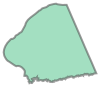

In [26]:
map_data.loc[21007, "geometry"]

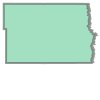

In [27]:
map_data.loc[38017, "geometry"]

In [ ]:
# this kind of code gives us a nice overview of what the geopandas dataframe is doing and the values it allows 
# and the polygons to be held and to be intepreted. 

We can plot all of the data at once using df.plot(). However, we will want to specify map parameters.

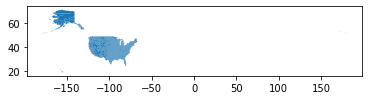

In [32]:
map_data.plot()

In [33]:
#COVID19Map.py
# . . .
def create_covid_geo_dataframe(covid_data, map_data, dates):
    # create geopandas dataframe with multiindex for date
    # original geopandas dataframe had no dates, so copies of the df are 
    # stacked vertically, with a new copy for each date in the covid_data index
    #(dates is a global)
     # cycle through the dates
    i = 0
    for date in dates:
        # select county observations from each date in dates
        # for each data, we create a dataframe of covid data for just that data
         # take limited set of the fips codes from the covid data even though they have the same column fips code 
        # select county observations from each date in dates
        
        df = covid_data[covid_data.index.get_level_values("date")==date]
        # use the fips_codes from the slice of covid_data to select counties
        # from the map_data index,making sure that the map_data index matches
        # the covid_data index
        # identify the fips associated with that data 
        
        counties = df.index.get_level_values("fips_code")
        # call a slice of the geodataframe that includes the counties 
        # that are in covid_data
        # pass the data with the same index 
        agg_df = map_data.loc[counties]
        # each row should reflect the date so that it is aligned 
        # with covid_data
        agg_df["date"] = date
        
        # we set the data for the geodata frame to be the data that we draw from the loop 
        if i == 0: # create the initial dataframe 
            # create the geodataframe, select coordinate system (.crs) to
            # match map_data.crs
            
            # when making the initial dataframe and call this geodataframe 
            # using the same coordinate system here, that is what CRS is to use the same coordinate system to make sure it matches. 
            matching_gpd = geopandas.GeoDataFrame(agg_df, crs = map_data.crs)
            i += 1
        else:
            # after initial geodataframe is created, stack a dataframe for
            # each date in dates. Once completed, index of matching_gpd
            # will match index of covid_data
            
            # we append every data and make our initial dataframe for January 22 and then get to January 23 and stack the dataframes 
            matching_gpd = matching_gpd.append(agg_df, ignore_index = False)    
            
    # Set mathcing_gpd index as["fips_code", "date"], liked covid_data index
    # set the index so that it is a multiindex with county and data 
    matching_gpd.reset_index(inplace=True)
    matching_gpd.set_index(["fips_code","date"], inplace = True)
    # add each column from covid_data to mathcing_gpd
    for key, val in covid_data.items():
        matching_gpd[key] = val
    return matching_gpd       

# . . . to end of script . . .
# dates will be used to create a geopandas DataFrame with multiindex 
dates = sorted(list(set(covid_data.index.get_level_values("date"))))
covid_data = create_covid_geo_dataframe(covid_data, map_data, dates)

In [34]:
covid_data

,,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,...,cumulative_deaths,cumulative_deaths_per_100_000,new_cases,new_deaths,new_cases_per_100_000,new_deaths_per_100_000,new_cases_7_day_rolling_avg,new_deaths_7_day_rolling_avg,state_abr,Location
fips_code,date,,,,,,,,,,,,,,,,,,,,,
1001,2020-01-22,1,001,00161526,0500000US01001,Autauga,06,1539602123,25706961,55869.0,Alabama,...,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Autauga, AL"
1003,2020-01-22,1,003,00161527,0500000US01003,Baldwin,06,4117546676,1133055836,223234.0,Alabama,...,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Baldwin, AL"
1005,2020-01-22,1,005,00161528,0500000US01005,Barbour,06,2292144655,50538698,24686.0,Alabama,...,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Barbour, AL"
1007,2020-01-22,1,007,00161529,0500000US01007,Bibb,06,1612167481,9602089,22394.0,Alabama,...,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Bibb, AL"
1009,2020-01-22,1,009,00161530,0500000US01009,Blount,06,1670103911,15015423,57826.0,Alabama,...,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Blount, AL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2020-11-01,56,037,01609192,0500000US56037,Sweetwater,06,27005754244,166230251,42343.0,Wyoming,...,2,4.53,23.0,0.0,52.13,0.0,17.57,0.0,WY,"Sweetwater, WY"
56039,2020-11-01,56,039,01605083,0500000US56039,Teton,06,10351784301,570864879,23464.0,Wyoming,...,1,4.34,12.0,0.0,52.04,0.0,9.57,0.0,WY,"Teton, WY"
56041,2020-11-01,56,041,01605084,0500000US56041,Uinta,06,5391631764,16625817,20226.0,Wyoming,...,3,14.56,4.0,0.0,19.41,0.0,8.14,0.0,WY,"Uinta, WY"


In [ ]:
# i = 0 to initial dataframe and could call something else, call it false 
# dataframe initialized or something like that and then switch it true once the dataframes initialized, but it also workds 

In [39]:
def create_covid_geo_dataframe(covid_data, map_data, dates):
    data_frame_initialized = False
    for date in dates:
        # pass the dates to this function 
        # the nice thing about this is that this is going to be automated
        # like we import the covid data and it has these dates, and we use the dates to have the latest update 
        df = covid_data[covid_data.index.get_level_values("date")==date]
        # we cycle through the dates that we took from the dataframe we begin with 
        # select only the data that reflexts that date 
        
        # next is to gather the counties 
        # we took data from particular day from the covid data, we are are taking the data from the counties in covin data 
        counties = df.index.get_level_values("fips_code") 
           
        # match your counties to the covin data and if your counties do not match the covid data, then get rid of the counties that are not 
        # in the covin data 
        agg_df = map_data.loc[counties]
        agg_df["date"] = date
        
        if data_frame_initialized == False           : # create the dataframe 
            matching_gpd = geopandas.GeoDataFrame(agg_df, crs = map_data.crs)
            data_frame_initialized = True
        else:  # stack the dataframe that was initialized 
            matching_gpd = matching_gpd.append(agg_df, ignore_index = False)    
            
# Set mathcing_gpd index as["fips_code", "date"], liked covid_data index
    # set the index so that it is a multiindex with county and data 
    matching_gpd.reset_index(inplace=True)
    matching_gpd.set_index(["fips_code","date"], inplace = True)
    # add each column from covid_data to mathcing_gpd
    for key, val in covid_data.items():
        matching_gpd[key] = val
    return matching_gpd  


# we need to combine two dataframes but the map data does not have all the dates that the covid data has 
# but the map data and the covid data are close to match 

# . . . to end of script . . .
# dates will be used to create a geopandas DataFrame with multiindex 

# nest three functions 
# there is date for every county and so we got all the data entries and get rid of duplicates 
# turn back to a list and we can sort it which is the minimum of the dates 
dates = sorted(list(set(covid_data.index.get_level_values("date"))))

# use our function, geo dataframe and pass the covid data, the mapdata and the sets of dates 
covid_data = create_covid_geo_dataframe(covid_data, map_data, dates)
            

In [40]:
covid_data

,,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,...,cumulative_deaths,cumulative_deaths_per_100_000,new_cases,new_deaths,new_cases_per_100_000,new_deaths_per_100_000,new_cases_7_day_rolling_avg,new_deaths_7_day_rolling_avg,state_abr,Location
fips_code,date,,,,,,,,,,,,,,,,,,,,,
1001,2020-01-22,1,001,00161526,0500000US01001,Autauga,06,1539602123,25706961,55869.0,Alabama,...,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Autauga, AL"
1003,2020-01-22,1,003,00161527,0500000US01003,Baldwin,06,4117546676,1133055836,223234.0,Alabama,...,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Baldwin, AL"
1005,2020-01-22,1,005,00161528,0500000US01005,Barbour,06,2292144655,50538698,24686.0,Alabama,...,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Barbour, AL"
1007,2020-01-22,1,007,00161529,0500000US01007,Bibb,06,1612167481,9602089,22394.0,Alabama,...,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Bibb, AL"
1009,2020-01-22,1,009,00161530,0500000US01009,Blount,06,1670103911,15015423,57826.0,Alabama,...,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Blount, AL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2020-11-01,56,037,01609192,0500000US56037,Sweetwater,06,27005754244,166230251,42343.0,Wyoming,...,2,4.53,23.0,0.0,52.13,0.0,17.57,0.0,WY,"Sweetwater, WY"
56039,2020-11-01,56,039,01605083,0500000US56039,Teton,06,10351784301,570864879,23464.0,Wyoming,...,1,4.34,12.0,0.0,52.04,0.0,9.57,0.0,WY,"Teton, WY"
56041,2020-11-01,56,041,01605084,0500000US56041,Uinta,06,5391631764,16625817,20226.0,Wyoming,...,3,14.56,4.0,0.0,19.41,0.0,8.14,0.0,WY,"Uinta, WY"


In [41]:
def create_new_vars(covid_data, moving_average_days):
    # use a for loop that performs the same operations for cases and deaths
    for key in ("cases", "deaths"):
        # capitilize the key 
        cap_key = key.title()
        
        # create the cases and deaths per million by drawing from the cumulative cases and dividing by total population 
        # when we say hundred thousand or per million, we mean per person times a million 
        # we are drawing fromm the covid data column, cumulative cases or cumulative deaths
        covid_data[cap_key + " per Million"] = covid_data["cumulative_" + key]\
            .div(covid_data["total_population"]).mul(10**6)
        # .groupby("fips_code")
        # the difference which is the difference between the current observarions and previous observations 
        # the magic thing is that this is telling us how many new cases we have every day or how many new deaths every day 
        covid_data["Daily " + cap_key + " per Million"] =\
            covid_data["cumulative_"+key].groupby(covid_data.index.names[0])\
            .diff(1).div(covid_data["total_population"]).mul(10**6)
        covid_data["Daily " + cap_key + " per Million MA"] = covid_data["Daily " +\
                cap_key + " per Million"].rolling(moving_average_days).mean()        

moving_average_days = 7
create_new_vars(covid_data, moving_average_days)

In [42]:
covid_data

,,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,...,new_cases_7_day_rolling_avg,new_deaths_7_day_rolling_avg,state_abr,Location,Cases per Million,Daily Cases per Million,Daily Cases per Million MA,Deaths per Million,Daily Deaths per Million,Daily Deaths per Million MA
fips_code,date,,,,,,,,,,,,,,,,,,,,,
1001,2020-01-22,1,001,00161526,0500000US01001,Autauga,06,1539602123,25706961,55869.0,Alabama,...,NaN,NaN,AL,"Autauga, AL",0.000000,NaN,NaN,0.000000,NaN,NaN
1003,2020-01-22,1,003,00161527,0500000US01003,Baldwin,06,4117546676,1133055836,223234.0,Alabama,...,NaN,NaN,AL,"Baldwin, AL",0.000000,NaN,NaN,0.000000,NaN,NaN
1005,2020-01-22,1,005,00161528,0500000US01005,Barbour,06,2292144655,50538698,24686.0,Alabama,...,NaN,NaN,AL,"Barbour, AL",0.000000,NaN,NaN,0.000000,NaN,NaN
1007,2020-01-22,1,007,00161529,0500000US01007,Bibb,06,1612167481,9602089,22394.0,Alabama,...,NaN,NaN,AL,"Bibb, AL",0.000000,NaN,NaN,0.000000,NaN,NaN
1009,2020-01-22,1,009,00161530,0500000US01009,Blount,06,1670103911,15015423,57826.0,Alabama,...,NaN,NaN,AL,"Blount, AL",0.000000,NaN,NaN,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2020-11-01,56,037,01609192,0500000US56037,Sweetwater,06,27005754244,166230251,42343.0,Wyoming,...,17.57,0.0,WY,"Sweetwater, WY",13260.194483,521.340980,562.145742,45.333998,0.0,0.0
56039,2020-11-01,56,039,01605083,0500000US56039,Teton,06,10351784301,570864879,23464.0,Wyoming,...,9.57,0.0,WY,"Teton, WY",35300.750249,520.404181,455.724669,43.367015,0.0,0.0
56041,2020-11-01,56,041,01605084,0500000US56041,Uinta,06,5391631764,16625817,20226.0,Wyoming,...,8.14,0.0,WY,"Uinta, WY",23678.975205,194.089961,483.451806,145.567471,0.0,0.0


In [ ]:
# https://www.worldometers.info/coronavirus/country/us/

In [ ]:
# we create the new variables and deaths in cases per million, we use the for loop, so that we can just make one set of code for each of the variables 
# we take the toal deaths divide by the population and expressed as a percentage. 

Text(0.5, 1.0, '2020-11-01\nCOVID-19 in the U.S.')

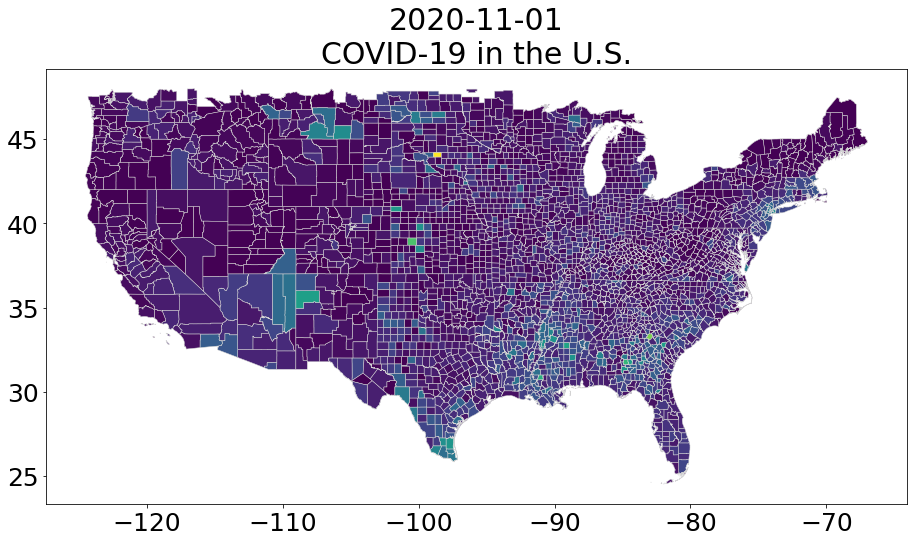

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
# If you choose to make a dynamic visualization for the homework
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick
#COVID19Map.py
# only include observations within these boundaries
# this will shrink the size of the map
def select_data_within_bounds(data, minx, miny, maxx, maxy):
    data = data[data.bounds["maxx"] <= maxx]
    data = data[data.bounds["maxy"] <= maxy]
    data = data[data.bounds["minx"] >= minx]
    data = data[data.bounds["miny"] >= miny]
    
    return data

# . . . to end of script
# choose the date here as the last date

date = dates[-1]

# choose map bounds
# create this variable map 
if "map_bounded" not in locals():
    # define all the boundary coordinates 
    minx = -127
    miny = 23
    maxx = -66
    maxy = 48
    # we call the function and redefine the data 
    covid_data = select_data_within_bounds(covid_data, minx, miny, maxx, maxy)
    # set the boundary true 
    map_bounded = True
    
    
    # plot the map 
fig, ax = plt.subplots(figsize=(18,8),
        subplot_kw = {'aspect': 'equal'})   
plt.rcParams.update({"font.size": 30})

# It stems from practice of having your configs executable - they are automatically Run at startup and they Configure your stuff.
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
key = "Deaths per Million"
df = covid_data[covid_data.index.get_level_values("date") == date]
df.plot(ax=ax, cax = ax, column=key, linewidth=.5, 
             edgecolor='lightgrey')
ax.set_title(str(date) + "\n" + "COVID-19 in the U.S.", fontsize = 30)